# Unit 4 activities - task A

## Task A: Correlation  


- Pre-process the data – mean population of each country and mean per capita GDP (from 2001 to 2021) by making some arrangements for the missing values (HINT: You will need to use the datasets Global_GDP.csv and Global_Population.csv).   
- Investigate any correlation between the mean population of each country and the mean per capita GDP (from 2001 to 2021).   
- Very briefly, interpret the generated plot.  
- Evaluate the Pearson Correlation Coefficient.

### Initial setup

In [153]:
# initial setup

import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import f_regression
import math



In [2]:
# load data

gdp = pd.read_csv("Datasets/Unit04 Global_GDP.csv")
pop = pd.read_csv("Datasets/Unit04 Global_Population.csv")


### Exploratory data analysis

In [3]:
# general exploration

gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 65 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            128 non-null    float64
 5   1961            134 non-null    float64
 6   1962            137 non-null    float64
 7   1963            137 non-null    float64
 8   1964            137 non-null    float64
 9   1965            148 non-null    float64
 10  1966            151 non-null    float64
 11  1967            154 non-null    float64
 12  1968            159 non-null    float64
 13  1969            159 non-null    float64
 14  1970            168 non-null    float64
 15  1971            171 non-null    float64
 16  1972            171 non-null    float64
 17  1973            171 non-null    flo

In [4]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 66 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Name  269 non-null    object
 1   Country Code  267 non-null    object
 2   Series Name   267 non-null    object
 3   Series Code   267 non-null    object
 4   1960          267 non-null    object
 5   1961          267 non-null    object
 6   1962          267 non-null    object
 7   1963          267 non-null    object
 8   1964          267 non-null    object
 9   1965          267 non-null    object
 10  1966          267 non-null    object
 11  1967          267 non-null    object
 12  1968          267 non-null    object
 13  1969          267 non-null    object
 14  1970          267 non-null    object
 15  1971          267 non-null    object
 16  1972          267 non-null    object
 17  1973          267 non-null    object
 18  1974          267 non-null    object
 19  1975    

In [ ]:
# exploring some observations (GDP)

print(gdp.head(),
      "\n",
      "\n",
      "\n",
      gdp.tail())

                  Country Name Country Code     Indicator Name  \
0                        Aruba          ABW  GDP (current US$)   
1  Africa Eastern and Southern          AFE  GDP (current US$)   
2                  Afghanistan          AFG  GDP (current US$)   
3   Africa Western and Central          AFW  GDP (current US$)   
4                       Angola          AGO  GDP (current US$)   

   Indicator Code          1960          1961          1962          1963  \
0  NY.GDP.MKTP.CD           NaN           NaN           NaN           NaN   
1  NY.GDP.MKTP.CD  1.929944e+10  1.970954e+10  2.147872e+10  2.571501e+10   
2  NY.GDP.MKTP.CD  5.377778e+08  5.488889e+08  5.466667e+08  7.511112e+08   
3  NY.GDP.MKTP.CD  1.040428e+10  1.112805e+10  1.194335e+10  1.267652e+10   
4  NY.GDP.MKTP.CD           NaN           NaN           NaN           NaN   

           1964          1965  ...          2011          2012          2013  \
0           NaN           NaN  ...  2.549721e+09  2.534637e+

In [18]:
# exploring some observations (population)

print(pop.head(),
      "\n",
      "\n",
      "\n",
      pop.tail())

                  Country Name Country Code        Series Name  Series Code  \
0                        Aruba          ABW  Population, total  SP.POP.TOTL   
1                  Afghanistan          AFG  Population, total  SP.POP.TOTL   
2  Africa Eastern and Southern          AFE  Population, total  SP.POP.TOTL   
3   Africa Western and Central          AFW  Population, total  SP.POP.TOTL   
4                      Albania          ALB  Population, total  SP.POP.TOTL   

        1960       1961       1962       1963       1964       1965  ...  \
0      54211      55438      56225      56695      57032      57360  ...   
1    8996967    9169406    9351442    9543200    9744772    9956318  ...   
2  130836765  134159786  137614644  141202036  144920186  148769974  ...   
3   96396419   98407221  100506960  102691339  104953470  107289875  ...   
4    1608800    1659800    1711319    1762621    1814135    1864791  ...   

        2012       2013       2014       2015       2016       2017 

Population dataset has some metadata in the last few rows. We should remove any observations with NaN country Code

### Data pre-processing

In [21]:
# removing NaN Country Code in both datasets

gdp_trim=gdp.dropna(subset='Country Code')

pop_trim=pop.dropna(subset='Country Code')

In [22]:
# ensuring all indicators are the same

print(gdp_trim['Indicator Name'].value_counts(),

pop_trim['Series Name'].value_counts())

Indicator Name
GDP (current US$)    266
Name: count, dtype: int64 Series Name
Population, total    267
Name: count, dtype: int64


In [23]:
# selecting relevant columns in each dataset and pivoting to long format

gdp_trim=gdp_trim[['Country Name','Country Code'] + [str(year) for year in range(2001, 2021)] ]

pop_trim=pop_trim[['Country Name','Country Code'] + [str(year) for year in range(2001, 2021)] ]

gdp_trim=pd.melt(gdp_trim, 
        id_vars=['Country Name', 'Country Code'], 
        value_vars=[str(year) for year in range(2001, 2021)],
        var_name="year",
        value_name='gdp')

pop_trim=pd.melt(pop_trim, 
        id_vars=['Country Name', 'Country Code'], 
        value_vars=[str(year) for year in range(2001, 2021)],
        var_name="year",
        value_name='pop')

# checking desired output

print(
    gdp_trim.head(),"\n","\n",
pop_trim.head())


                  Country Name Country Code  year           gdp
0                        Aruba          ABW  2001  1.920112e+09
1  Africa Eastern and Southern          AFE  2001  2.586600e+11
2                  Afghanistan          AFG  2001           NaN
3   Africa Western and Central          AFW  2001  1.480120e+11
4                       Angola          AGO  2001  8.936064e+09 
 
                   Country Name Country Code  year        pop
0                        Aruba          ABW  2001      92898
1                  Afghanistan          AFG  2001   21606992
2  Africa Eastern and Southern          AFE  2001  408522129
3   Africa Western and Central          AFW  2001  274433894
4                      Albania          ALB  2001    3060173


In [24]:
# merging both tables

data_merged = pd.merge(gdp_trim, pop_trim, how='inner', on=['Country Name', 'Country Code', 'year']) # inner join as we can only use observations for which we have both gdp and pop

In [ ]:
# further data checks on missing values

total = data_merged.isnull().sum().sort_values(ascending=False)
percent = (data_merged.isnull().sum()/data_merged.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['Total Missing Count', '% of Total Observations'])
missing_data.index.name =' Numeric Feature'

missing_data.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5340 entries, 0 to 5339
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  5340 non-null   object 
 1   Country Code  5340 non-null   object 
 2   year          5340 non-null   object 
 3   gdp           5102 non-null   float64
 4   pop           5339 non-null   object 
dtypes: float64(1), object(4)
memory usage: 208.7+ KB


,Total Missing Count,% of Total Observations
Numeric Feature,,
gdp,238,0.044569
pop,1,0.000187
Country Name,0,0.000000
Country Code,0,0.000000
year,0,0.000000


Need to remove observations with missing values for either gdp or pop.

In [28]:
# removing observations with missing values for either gdp or pop and rechecking counts

data_merged=data_merged.dropna(subset=['gdp', 'pop'])

# further data checks on missing values

total = data_merged.isnull().sum().sort_values(ascending=False)
percent = (data_merged.isnull().sum()/data_merged.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['Total Missing Count', '% of Total Observations'])
missing_data.index.name =' Numeric Feature'

missing_data.head(20)

,Total Missing Count,% of Total Observations
Numeric Feature,,
Country Name,0,0.0
Country Code,0,0.0
year,0,0.0
gdp,0,0.0
pop,0,0.0


In [36]:
# rechecking data

data_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5102 entries, 0 to 5339
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  5102 non-null   object 
 1   Country Code  5102 non-null   object 
 2   year          5102 non-null   object 
 3   gdp           5102 non-null   float64
 4   pop           5102 non-null   object 
dtypes: float64(1), object(4)
memory usage: 239.2+ KB


Population still showing as object, why?

In [38]:
data_merged['pop'].sort_values()

4647         ..
372          ..
373          ..
375          ..
3040         ..
         ...   
774       99591
2222    9964470
4658    9965322
2772    9971727
1314       9997
Name: pop, Length: 5102, dtype: object

Some hidden missing values of "..", will remove these

In [45]:
# removing remaining missing value for population and recode variable

data_merged = data_merged[data_merged['pop'] != ".."]

data_merged['pop']=data_merged['pop'].astype(float)

In [46]:
# compute GDP per capita

data_merged['gdp_per_capita']=data_merged['gdp']/data_merged['pop']

### Correlation

In [76]:
####COMPUTE MEANS ACROSS YEARS

data_means=data_merged.groupby(['Country Code', 'Country Name']).agg({'gdp_per_capita': 'mean', 'pop':'mean'}).reset_index()

pd.options.display.float_format = '{:.2f}'.format # preventing scientific notation

data_means.head()


,Country Code,Country Name,gdp_per_capita,pop
0,ABW,Aruba,25133.56,101231.94
1,AFE,Africa Eastern and Southern,1361.69,532128233.15
2,AFG,Afghanistan,439.06,30665934.37
3,AFW,Africa Western and Central,1492.34,359471406.95
4,AGO,Angola,3103.86,24186547.10


<Axes: xlabel='pop', ylabel='gdp_per_capita'>

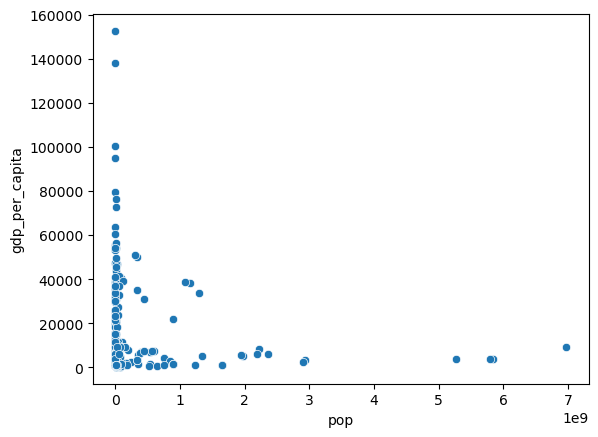

In [77]:
# scatter plots


sns.scatterplot(data_means, x='pop',y='gdp_per_capita')

There are some outliers with very high populations. Let's explore these.

In [81]:
data_means[['pop', 'Country Name']].sort_values('pop', ascending=False)

,pop,Country Name
249,6971251911.90,World
101,5842844151.10,IDA & IBRD total
134,5790143516.50,Low & middle income
149,5266190891.30,Middle income
62,2927291314.45,Early-demographic dividend
...,...,...
219,32102.40,Turks and Caicos Islands
203,31179.32,San Marino
181,18497.60,Palau
236,10604.45,Tuvalu


Clearly some observations for entire regions rather that countries. Let's investigate these manually and remove anything that represents a supra-national aggregate (allowing for smaller sub-national regions to remain as they likely represent specific geographic/economical settings)

In [99]:
# removing regions which do not represent individual countries

pd.set_option('display.max_rows', None)

print(data_means[['Country Name', 'Country Code']])

pd.set_option('display.max_rows', 10)

codes_to_remove=['AFE', 
                 'AFW', 
                 'ARB', 
                 'CEB', 
                 'CHI', 
                 'CSS', 
                 'EAP', 
                 'EAR', 
                 'EAS', 
                 'ECA',
                 'ECS',
                 'EMU', 
                 'EUU',
                 'FCS',
                 'HIC',
                 'HPC',
                 'IBT',
                 'LAC',
                 'LCN',
                 'LDC',
                 'LIC',
                 'LMC',
                 'LMY',
                 'LTE',
                 'MEA',
                 'MIC',
                 'MNA',
                 'NAC', 
                 'OED',
                 'OSS',
                 'PRE',
                 'PSS',
                 'PST',
                 'SAS',
                 'SSF',
                 'SST',
                 'TEA',
                 'TEC',
                 'TLA',
                 'TMN',
                 'TSA',
                 'TSS',
                 'UMC',
                 'WLD']

data_means=data_means[~data_means['Country Code'].isin(codes_to_remove)]


                       Country Name Country Code
0                             Aruba          ABW
2                       Afghanistan          AFG
4                            Angola          AGO
5                           Albania          ALB
6                           Andorra          AND
8              United Arab Emirates          ARE
9                         Argentina          ARG
10                          Armenia          ARM
11                   American Samoa          ASM
12              Antigua and Barbuda          ATG
13                        Australia          AUS
14                          Austria          AUT
15                       Azerbaijan          AZE
16                          Burundi          BDI
17                          Belgium          BEL
18                            Benin          BEN
19                     Burkina Faso          BFA
20                       Bangladesh          BGD
21                         Bulgaria          BGR
22                  

C:\Users\guilhermep\AppData\Local\Temp\ipykernel_11724\641821359.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(),fontsize=5)


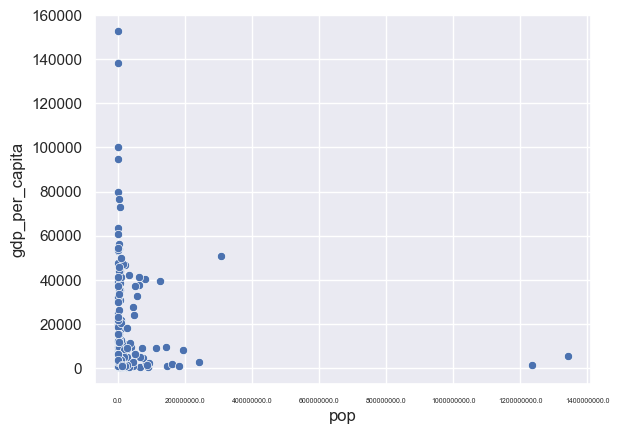

In [109]:
# scatter plots

ax=sns.scatterplot(data_means, x='pop',y='gdp_per_capita')


plt.ticklabel_format(style='plain', axis='both')

ax.set_xticklabels(ax.get_xticks(),fontsize=5)

plt.show()

Still some outliers remaining, let's explore these further.

In [110]:
data_means[['pop', 'Country Name']].sort_values('pop', ascending=False)

,pop,Country Name
40,1344129718.10,China
104,1236168431.75,India
242,309216015.30,United States
102,243809914.65,Indonesia
29,196037653.80,Brazil
...,...,...
219,32102.40,Turks and Caicos Islands
203,31179.32,San Marino
181,18497.60,Palau
236,10604.45,Tuvalu


Observations as expected. Given the spread seen it is likely that a logaritmic transformation would improve data discrimination. Let's try this

In [125]:
# log 10 transformation

data_means=data_means.assign(pop_log = np.log10(data_means['pop']),
                             gdp_per_capita_log=np.log10(data_means['gdp_per_capita']))

Text(0.05, 0.8, "Pearson's r =-0.31")

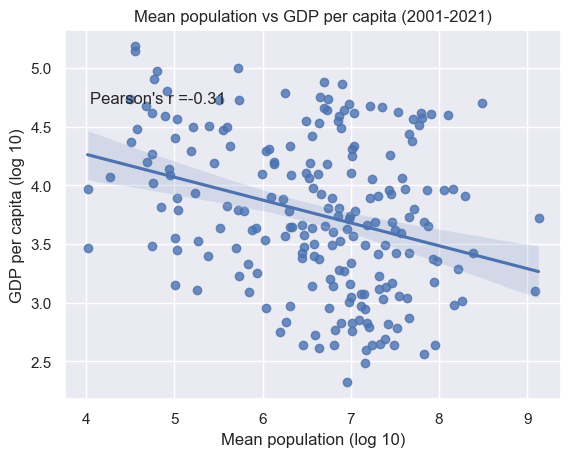

In [139]:
# scatter plot



ax=sns.regplot(x=data_means.pop_log,
            y=data_means.gdp_per_capita_log)

ax.set_title("Mean population vs GDP per capita (2001-2021)")
ax.set_xlabel("Mean population (log 10)")
ax.set_ylabel("GDP per capita (log 10)")

r, p = pearsonr(x=data_means.pop_log, y=data_means.gdp_per_capita_log)
plt.text(.05, .8, "Pearson's r ={:.2f}".format(r), transform=ax.transAxes)


The scatterplot, linear regression line, and Pearson's coefficient suggest a moderate inverse linear association between average country population and average GDP per capita between 2001 and 2021.

# Task B - linear regression

Perform linear regression, where the independent variable is the mean population of each country (from 2001 to 2021) and dependent variable is mean per capita GDP (from 2001 to 2021)

In [ ]:
# linear regression

x_train = data_means.pop_log.values.reshape(-1, 1)
y_train=data_means.gdp_per_capita_log.values

model=LinearRegression()

model.fit(x_train, y_train)

# calculate slope and intercept 
slope_log = model.coef_[0]
intercept_log = model.intercept_

print(f"Log-Transformed Slope: {slope_log}")
print(f"Log-Transformed Intercept: {intercept_log}")

# calculate model performance

# Make predictions on the test set
y_pred = model.predict(x_train)

# Calculate and print regression model metrics
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
print(f"Root mean squared error (RMSE): {math.sqrt(mse)}")
print(f"R-squared: {r2}")



Log-Transformed Slope: -0.19470488724763915
Log-Transformed Intercept: 5.0430067237137255
Root mean squared error (RMSE): 0.6248642017949047
R-squared: 0.09313483722462801


Moderate predictive capability, with R-squared 0.09 only.